# Open-Ended Survey Word Clouds
- By Claire MacDonald
- for ACOSUS Factors Group
- last edited 01/12/2024
- last commented 03/29/2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [3]:
#loading data  
nov2023data = pd.read_csv('2023-Nov-ACOSUSData-Complete.csv')

In [4]:
"""
This cell is dedicated to 
dropping all empty fields
in the CSV file
"""

Q16 = nov2023data['Q16']
Q16 = Q16.dropna()

Q17 = nov2023data['Q17']
Q17 = Q17.dropna()

Q23 = nov2023data['Q23']
Q23 = Q23.dropna()

Q24 = nov2023data['Q24']
Q24 = Q24.dropna()

Q25 = nov2023data['Q25'] 
Q25 = Q25.dropna()

In [ ]:
"""
This singular function first creates all lists,objects, and sets needed 
for the lemmization process.

- It parses through the responses in the 
CSV file, then cleans out the lists of filter words and stop words.

- The cleaned and lemmatized words are appended to a list.

- This list is then made into a pandas Dataframe

- the data in the Dataframe will be added to a string that will be 
used as a parameter to the import WordCloud methodsto generate the 
final result
"""

def word_cloud(Q, filter_words):
    lemmatizer = WordNetLemmatizer()
    Q_new = pd.DataFrame()
    L = []
    stop_words = stopwords.words('english')
    stop_words.extend(['from','want' ,'subject', 're', 'edu', 'use', 'make','think','well','know',
                       'go','really','back','youre','lot','okay','yeah','going','went','dont','say',
                       'one','much','maybe','yes','thats','see','thing','kind','social','medium','northeastern',
                       'im','am','āôt','äôs'])
    stop_words = set(stop_words)  
    #leminzation of responses
    for sent in Q: 
        sent_new = sent.translate(str.maketrans('', '', string.punctuation))
        words = sent_new.split()
        sn = ""
        for w in words:
            if w.lower() not in stop_words:
                if lemmatizer.lemmatize(w.lower()) not in filter_words:
                    if not w.lower().isdigit():
                         sn = sn + lemmatizer.lemmatize(w.lower()) + " "
        L.append(sn)
    L = [i for i in L if i != 'm' and i != 's' and i != 't']
    Q_new = pd.DataFrame(L)


    text = ' '.join(Q_new[0])
    # Create and generate a word cloud image:
    wordcloud = WordCloud(colormap='winter_r', background_color = 'white').generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [14]:
"""
Here is the list of words that the stop_words list in the previous cell did not catch.
This filter list is used in the nested for loop with the variable filter_words
"""

#filter list for question 1
filter_words1 = list(('le','specifyi','ImportIdQID178TEXTImportIdQID17TEXT','v','select','making','might','social','help','student','decision','program','able','helped','interest','major','actually','got','school','university','important',
                     'college', 'didnt','degree','year','medium','community','nursing','associate','look','guess','several','information',
                     'originally','wasnt','transfer','course','choice','transferred','first','remember','transferring','example','decided',
                     'worked','friend','around','knew','play','take','huge','reason','mainly','right','people','werent','pretty','good','title',
                     'selecting','mean','anything','look','parent','known','factor','issue','depending','realized','different','high','recall'
                     'afterwards','chicago','used','little','started','foot','better','recall','role','cr','oh','sure','seeing','big','gonna',
                     'regularly','primarily','probably','specific','gotten','find','cover','younger','previously','please','science','computer',
                     'still','without','enough','class','ive','wanted','state','sense','looking','something','u','california','personally','bit','try',
                     'even','way','deciding','uic','age','trying','within','needed','give','found','near','felt','gone','sport','come','coach','feel',
                     'team','continue','extra','4year','theyre','goal','mathematics','pursue','behind','complete','made','took','super','education',
                     'awesome','part','based','live','couple','far','couldnt','sort','dad','point','versus','looked','fact','always','getting','hard','ended',
                     'theyve','told','pay','wish','move','life','thing','junior','stuff','required','wise','thought','actual','easier','seperate','contributed',
                     'comfortable','certain','side','said','talked','financial','financially','instead','ignored','completed','working','sonoma','pushed','dorming',
                     'path','distributed','kinesiology','itll','away','picking','realize','single','understand','research','m','b','enjoy','perhaps''history',
                     'case','cousin','lucky','depends','matter','house','watch','searching','researching','another', 'applied','order','afterwards','usually','extent',
                     'ideal','end','doesnt','anywhere','seem','cool','picked','heard','whenever','really','finally','list','dependent','whereas','joining'))

#filter list for question 2
filter_words2 = list(('person','four','costcostcost''person','transferplease','session','select','4year','throughout','wonderful','making','obtain','associate','adult',
                      'understand','theyre','ive','mostly','affect','list','breaking','knowing','compared','without','still','offer','helped','obviously','indicate','information','degree','university','sure','able','help','yes','youre','two','please','community','college','university','program'
                     'important','need','victoria','realized','answer','bit','student','need','got','wallet','keep','felt','school','science','basically',
                     'decision','high','actually','city','transfer','m','program','probably','way','year','getting','reason','main','knew','soon','ultimately',
                     'factor','set','told','gonna','possible','put','needed','pushed','pushing','intro','doesnt','something','started','difficult','transferred',
                     'wanted','even','feel','transferring','important','struggling','still','guess','bachelor','ive','onto'))

#filter list for question 3
filter_words3 = list(('made','required','learning','encountered','counted','institution','finding','full','high','nothing','none','student','easier','challenge','getting','stuff','already','ive','cant','needed','somebody','looking','havent','college','school',
                     'help','community','wasnt','program','university','degree','class','course','transfer','put','question','year',
                     'mean','done','probably','situation','yet','little','information','plan','right','trying','didnt','take','semester',
                     'deciding','mostly','available','three','mainly','way','theyll','find','need','might','ill','able','transferred','hold',
                     'area','difficult','theyre','gone','live','account','sense','many','though','humboldt','doesnt','pretty','talk','even','first',
                     'person','spring','keeping','helped','california','cause','associate','cal','poly','different','transferring','sometimes','two',
                     'making','thing','people','general','record','wanted','finally','issue','junior','actually','apply','process','gonna','keep','got',
                     'ended','alone','bit','case','outside','sure','biggest','feel','used','hard','humble','coming','always','life','thought','bad','come',
                     'away','fire','fill','anything','said','youll','everything','taking','new'))

#filter list for question 4
filter_words4 = list(('career','t','computer','challenging','needed','expectation','expected','compared','plan','change','wanted','change','changed','none','bad','reaching','transfer','example','negligible','ill','easier','bachelor','instead','ive',
                      'keep','right','theyre','science','doctor','explaining','afterwards','student','degree','mainly','concern','ive,','im','day','meet','talked','type','program',
                      'gave','didnt','semester','mean','getting','thing','something','worked','actually','concerns','community','college','university','experience',
                      'current','maybe','help','homework','gened','yet','feel','required','felt','taking','way','havent','even','whats','helpful','anything','hour',
                     'cause','way','waste','ive','great','whats','dated','still','far','right','another','able','looking','learning','require','need','wrong','hinder',
                      'contribute','law','factor','sometimes','take','bit','driving','sure','come','probably','live','better','geneds','put','least','human','seem',
                     'forget','poly','sport','couple','cyber','previously','stay','relevant','cal','c','letting','question','never','directly'))

#filter list for question 5
filter_words5 = list(('āôt','äôs','don','felt','learned','don t','major','none','neiu','sure','transfer','year','took','semester','class','help','thing','feel','school','ive','career','plan','transfer','student','wanted','part','university','college','community','gonna','didnt',
                     'something','getting','little','changed','state','degree','sort','need','humbolt','work','taking','different','definitely','sonoma','teaching',
                      'shifted','skill','nothing','thinking','versus','certain','guess','still','might','fall','idea','pretty','area','helped','city','become',
                     'accepted','type','learning','living','looking','wasnt','certain','mostly','transferring','mostly','type','speaking','last','helped','common',
                      'nowadays','become','plus','way','saying','hard','considering','meokay','put','but','cityi','coin','realize','difficulty','expensive','never',
                     'stuff','noticed','left','present','right','cetera','directly','deciding','figure','cheaper','flip','thought','change','expose','grocery','nervous',
                     'came','toward','expense','first','able','far','u','lead','transferred','changing','bit','learning','everything','education','interesting','buy',
                      'hoping','cinema','comfortable','rural','taught','county','decision','insight','important','take','many','come','cant',
                     'tutor','tribe','mean','wouldnt','basically','face','already','even','course','wanna','realized','try','actually','attending','public','similar','theyre',
                     'often','try','better','share','week','whether','better','start','quicker','outside','day','bachelor','studying','study'))




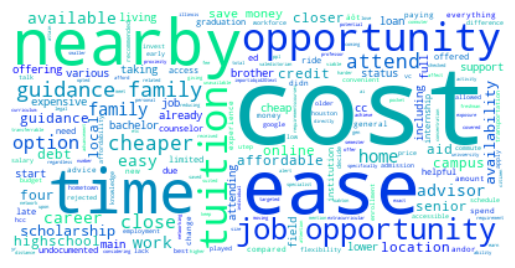

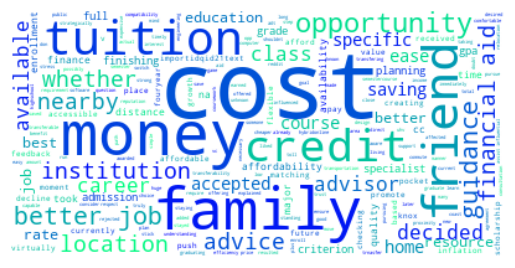

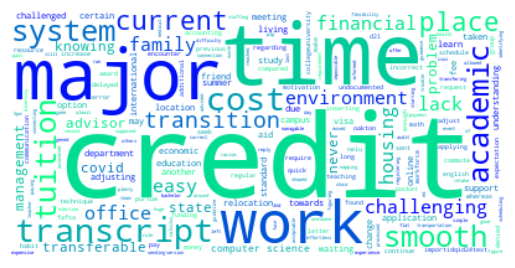

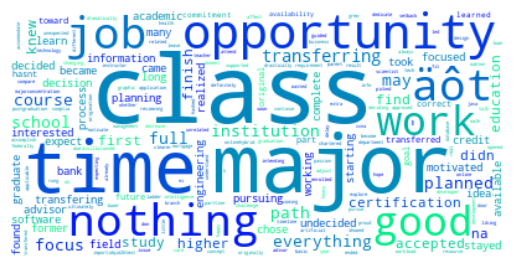

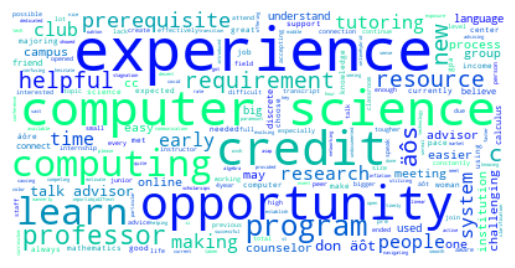

In [ ]:
"""
The calling of the code in previous cells
to generate word clouds
"""


word_cloud(Q16,filter_words1)
word_cloud(Q17,filter_words2)
word_cloud(Q23,filter_words3)
word_cloud(Q24,filter_words4)
word_cloud(Q25,filter_words5)